In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.lines import Line2D
from plot_style import *
from flox.flock import Flock

In [59]:
df = pd.read_feather("edge_run.rounds_10.feather")
df["training_end"] = pd.to_datetime(df.training_end, format="%H:%M:%S")
df.head()

,train/acc,train/loss,train/epoch,train/batch_idx,train/time,training_start,training_end,node/idx,node/kind,parent/idx,parent/kind,round,test/acc,test/loss,train/rel_time
0,0.03125,2.288605,0,0,2024-04-02 22:10:58.234050,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.431472
1,0.03125,2.300116,0,1,2024-04-02 22:10:58.247514,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.444936
2,0.06250,2.292505,0,2,2024-04-02 22:10:58.260596,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.458018
3,0.15625,2.286013,0,3,2024-04-02 22:10:58.273637,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.471059
4,0.09375,2.297627,0,4,2024-04-02 22:10:58.286880,2024-04-02 22:10:23.309424,2024-04-02 22:11:20.157853,worker2.1,worker,agg2,aggregator,0,0.1,2.304467,18041.484302


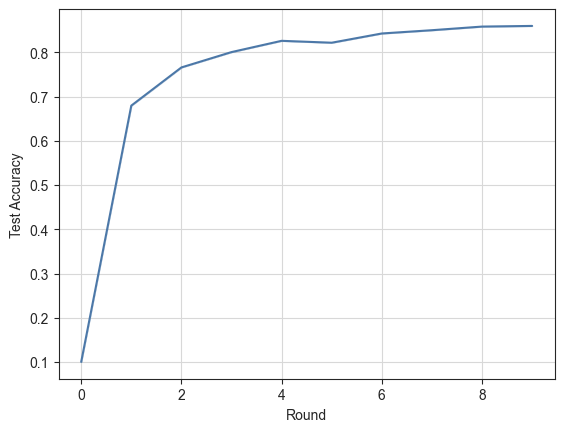

In [3]:
sns.lineplot(
    df,
    x="round",
    y="test/acc",
)
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.savefig("test_acc.pdf", bbox_inches="tight")
plt.show()

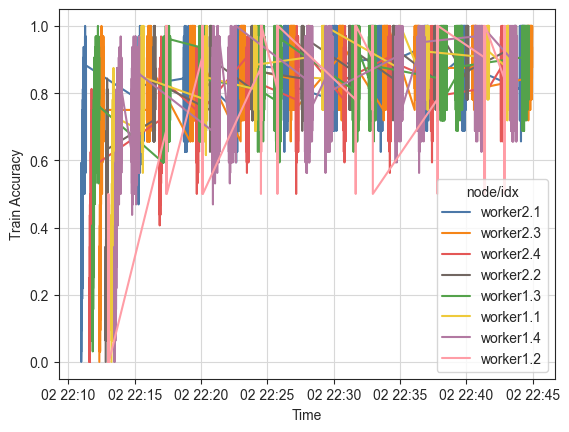

In [4]:
# sns.lineplot(
#     df,
#     x="train/time",
#     y="train/acc",
#     hue="node/idx",
#     errorbar=None,
# )
# plt.xlabel("Time")
# plt.ylabel("Train Accuracy")
# plt.savefig("test_acc_by_worker.pdf", bbox_inches="tight")
# plt.show()

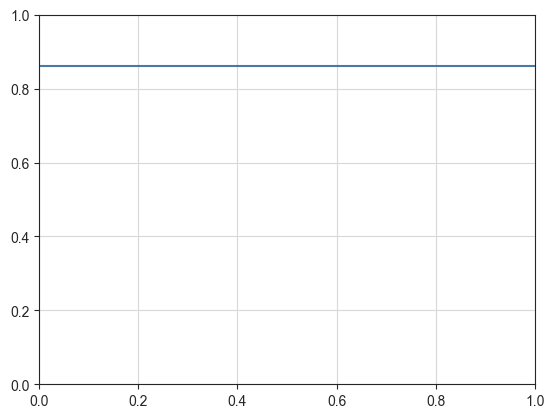

In [87]:
test_acc = df.query("round == 9")["test/acc"].unique().item()
plt.axhline(test_acc)
plt.show()

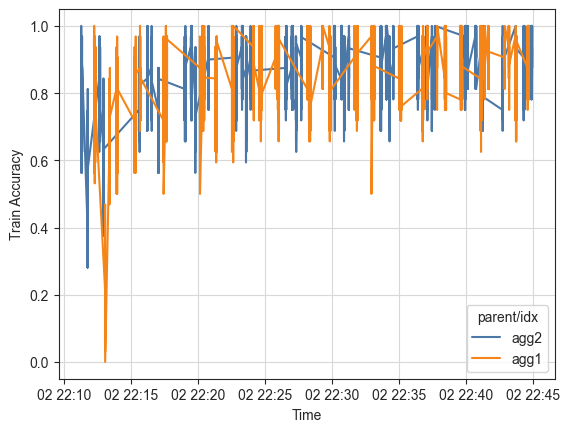

In [5]:
# sns.lineplot(
#     df.query("`train/epoch` == 4"),
#     x="train/time",
#     y="train/acc",
#     hue="parent/idx",
#     errorbar=None,
# )
# plt.xlabel("Time")
# plt.ylabel("Train Accuracy")
# plt.savefig("test_acc_by_aggr.pdf", bbox_inches="tight")
# plt.show()

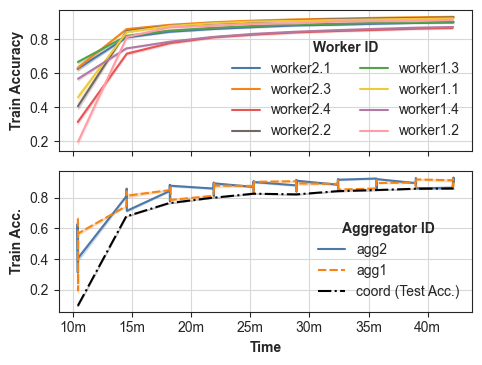

In [153]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 3.75), sharex=True)

# Per-worker
i = 0
sns.lineplot(
    df,
    x="training_start",
    y="train/acc",
    hue="node/idx",
    ax=axes[i],
)

# Get the x-ticks and -labels and then show the labels by minute instead of date.
# ticks = axes[i].get_xticks()
# labels = axes[i].get_xticklabels()
# labels = ["{}m".format(l.get_text().split()[-1].split(":")[-1]) for l in labels]
# axes[i].set_xticks(ticks, labels, rotation=0)

axes[i].set_xlabel("Time", weight="bold")
axes[i].set_ylabel("Train Accuracy", weight="bold")
legend = axes[i].legend(title="Worker ID", ncols=2, fancybox=False, edgecolor="k", frameon=False)
plt.setp(legend.get_title(), weight="bold")
# axes[i].axhline(test_acc, linestyle="--", color="k", linewidth=2)
# axes[i].text(ticks[0], 0.9, "Test Acc.", weight="bold", color="k")

# Per-aggr.
i = 1
sns.lineplot(
    df,
    x="training_start",
    y="train/acc",
    hue="parent/idx",
    style="parent/idx",
    ax=axes[i],
)

sns.lineplot(
    df,
    x="training_start",
    y="test/acc",
    linestyle="-.",
    color="black",
    ax=axes[1]
)

# Get the x-ticks and -labels and then show the labels by minute instead of date.
ticks = axes[i].get_xticks()
labels = axes[i].get_xticklabels()
labels = ["{}m".format(l.get_text().split()[-1].split(":")[-1]) for l in labels]

axes[i].set_xticks(ticks, labels, rotation=0)
axes[i].set_xlabel("Time", weight="bold")
axes[i].set_ylabel("Train Acc.", weight="bold")

handles, labels = axes[i].get_legend_handles_labels()
handles.extend([Line2D([0], [0], label="coord (Test Acc.)", color="black", linestyle="-.")])

legend = axes[i].legend(title="Aggregator ID", fancybox=False, edgecolor="k", frameon=False, handles=handles)

plt.setp(legend.get_title(), weight="bold")
# axes[i].axhline(test_acc, linestyle="--", color="k", linewidth=2)
# axes[i].text(ticks[0], 0.9, "Test Acc.", weight="bold", color="k")
axes[i].set_ylabel("Train Acc.", weight="bold")

plt.tight_layout()
plt.savefig("ec2_acc.pdf", bbox_inches="tight")
plt.show()

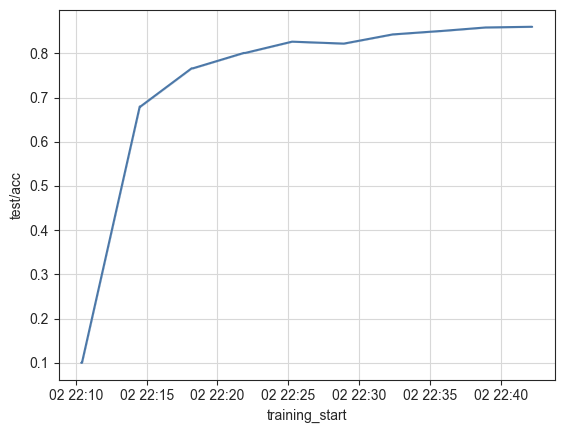

In [121]:
sns.lineplot(
    df,
    x="training_start",
    y="test/acc",
)
plt.show()

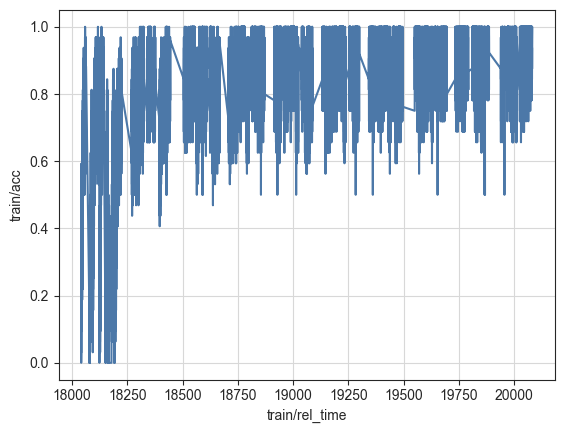

In [27]:
sns.lineplot(
    df,
    x="train/rel_time",
    y="train/acc",
)
plt.show()

In [29]:
ts = df.training_start.iloc[0]

In [33]:
dir(ts)

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_creso',
 '_date_repr',
 '_from_dt64',
 '_from_value_and_reso',
 '_repr_base',
 '_round',
 '_time_repr',
 '_value',
 'as_unit',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_mo

In [38]:
ts.strftime("%M:%S")

'10:23'

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

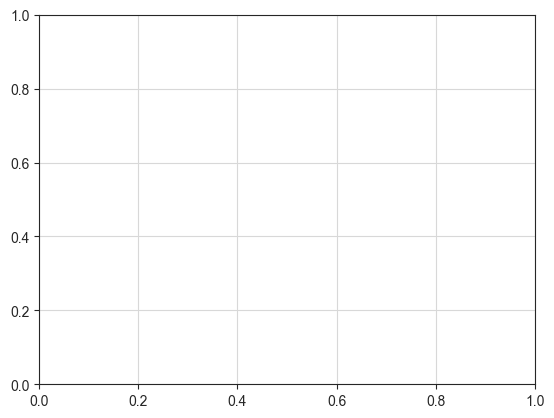

In [50]:
sns.kdeplot(df, x="training_end_diff")
plt.show()

In [51]:
df.training_end_diff.dtype

dtype('<m8[us]')